

```
# This is formatted as code
```

# **Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [5]:
from google.colab import files
import pandas as pd

#  upload the file to colab
uploaded_file = files.upload()

#open the file as csv
file_name = next(iter(uploaded_file))
dataset = pd.read_csv(file_name, encoding="ISO-8859-1")

# Display the first few rows of the dataset
dataset.head()


Saving spam.csv to spam.csv


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


*italicized text*# **Load the dataset**

# **Exploring the Dataset**

In [6]:
# remove the unused coloums from the dataset
removed_coloums = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
dataset = dataset.drop(removed_coloums, axis=1)

In [7]:
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
dataset.shape

(5572, 2)

In [9]:
dataset.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
dataset[dataset.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [11]:
dataset = dataset.drop_duplicates()
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
dataset["v1"].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

# **Data Visualisation**

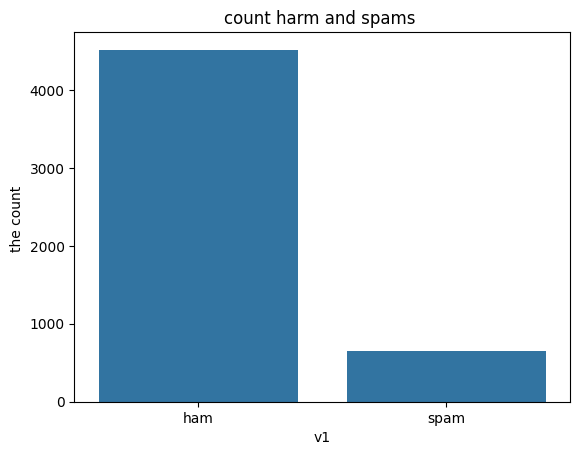

In [13]:
sns.countplot(data=dataset, x='v1')
plt.xlabel('v1')
plt.ylabel('the count ')
plt.title('count harm and spams ')
plt.show()

# **Data Preprocessing**

In [14]:
#convert the v1 coloum into numeric
dataset.loc[dataset["v1"] == "spam", "Category"] = 0
dataset.loc[dataset["v1"] == "ham", "Category"] = 1

dataset.head()

<ipython-input-14-b1dc7c640125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[dataset["v1"] == "spam", "Category"] = 0


,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [15]:
# Separate the feature (v2) and target (category) data
X=dataset['v2']
y=dataset['Category']


In [16]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [17]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5169, dtype: float64

In [18]:
#spliting the data into train ,test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
# we transform these text messages into numerical feature vector
feature_vector = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train = feature_vector.fit_transform(X_train)
X_test = feature_vector.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [20]:
X_train.shape

(4135, 7370)

# **Model Training**
# **DecisionTree & RandomForest **

In [21]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

# **Model Evaluation**

In [22]:
#Model Evaluation
dt_prediction_on_training_data = dt_model.predict(X_train)
dt_accuracy_on_training_data = accuracy_score(y_train, dt_prediction_on_training_data)

dt_prediction_on_test_data = dt_model.predict(X_test)
dt_accuracy_on_test_data = accuracy_score(y_test, dt_prediction_on_test_data)

# Print accuracy for Decision Tree
print('Decision Tree - Accuracy on training data: {} %'.format(dt_accuracy_on_training_data * 100))
print('Decision Tree - Accuracy on test data: {} %'.format(dt_accuracy_on_test_data * 100))


Decision Tree - Accuracy on training data: 100.0 %
Decision Tree - Accuracy on test data: 95.74468085106383 %


In [23]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

# **Model Evaluation**

In [24]:
#Model Evaluation
rf_prediction_on_training_data = rf_model.predict(X_train)
rf_accuracy_on_training_data = accuracy_score(y_train, rf_prediction_on_training_data)

rf_prediction_on_test_data = rf_model.predict(X_test)
rf_accuracy_on_test_data = accuracy_score(y_test, rf_prediction_on_test_data)

# Print accuracy for Random Forest
print('Random Forest - Accuracy on training data: {} %'.format(rf_accuracy_on_training_data * 100))
print('Random Forest - Accuracy on test data: {} %'.format(rf_accuracy_on_test_data * 100))

Random Forest - Accuracy on training data: 100.0 %
Random Forest - Accuracy on test data: 97.1953578336557 %


# **Calculating and Displaying Error Metrics**

In [26]:
# Generate classification report for Decision Tree
dt_prediction_for_test_data = dt_model.predict(X_test)
dt_classification_report = classification_report(y_test, dt_prediction_for_test_data, target_names=['Spam', 'Ham'])

print("Classification Report for Decision Tree:")
print(dt_classification_report)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

        Spam       0.84      0.84      0.84       138
         Ham       0.98      0.98      0.98       896

    accuracy                           0.96      1034
   macro avg       0.91      0.91      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [27]:
# Generate classification report for Random Forest
rf_prediction_for_test_data = rf_model.predict(X_test)
rf_classification_report = classification_report(y_test, rf_prediction_for_test_data, target_names=['Spam', 'Ham'])

print("Classification Report for Random Forest:")
print(rf_classification_report)

Classification Report for Random Forest:
              precision    recall  f1-score   support

        Spam       0.98      0.80      0.88       138
         Ham       0.97      1.00      0.98       896

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



# **Make Predictions on New Input**

> Add blockquote




In [29]:
#Spam i/p: Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!
#Ham i/p: Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience
test_mail ="Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience"


In [34]:
# Transform the test mail into numerical features using the same TF-IDF vectorizer
data_feature_vector_dt = feature_vector.transform([test_mail])

# Make prediction using the Decision Tree model
prediction_dt = dt_model.predict(data_feature_vector_dt)

# Decode the prediction (0 for spam, 1 for ham)
if prediction_dt[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [35]:
# Transform the test mail into numerical features using the same TF-IDF vectorizer
data_feature_vector_rf = feature_vector.transform([test_mail])

# Make prediction using the Random Forest model
prediction_rf = rf_model.predict(data_feature_vector_rf)

# Decode the prediction (0 for spam, 1 for ham)
if prediction_rf[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")


Ham Mail
